Exampe taken from: https://rosettacode.org/wiki/Runge-Kutta_method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RHS(t, x):
    return(t * np.sqrt(x))

In [3]:
def ActualAns(t):
    return (1/16)*(t**2 + 4)**2

In [4]:
def SolveRK4(dt, tn, xn):
    k1 = dt * RHS(tn, xn)
    k2 = dt * RHS(tn + 0.5*dt, xn + 0.5*k1)
    k3 = dt * RHS(tn + 0.5*dt, xn + 0.5*k2)
    k4 = dt * RHS(tn + dt, xn + k3)
    dx = (1.0/6) * (k1 + 2*k2 + 2*k3 + k4)
    return (dx)

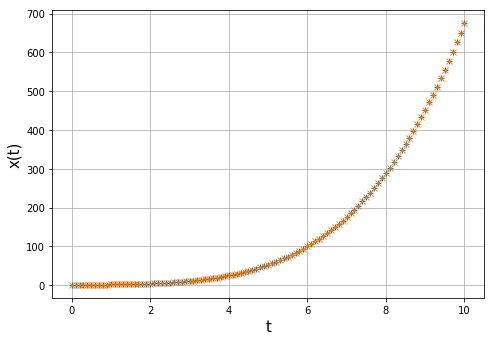

CPU times: user 204 ms, sys: 8.74 ms, total: 213 ms
Wall time: 213 ms


In [5]:
%%time
#--------------------
tmin = 0.0
tmax = 10.0
N = 101
dt = (tmax - tmin)/(N - 1)
t_line = np.linspace(tmin, tmax, N)

x = 1.0  #IC

CalcAns = []
for t in t_line:
    CalcAns.append(x)
    dx = SolveRK4(dt, t, x)
    xnew = x + dx
    x = xnew
#--------------------
TrueAns = ActualAns(t_line)
#--------------------
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(t_line, TrueAns, "+")
ax.plot(t_line, CalcAns, "x")

ax.set_xlabel("t", fontsize=15)
ax.set_ylabel("x(t)", fontsize=15)

ax.grid()
plt.show()

---

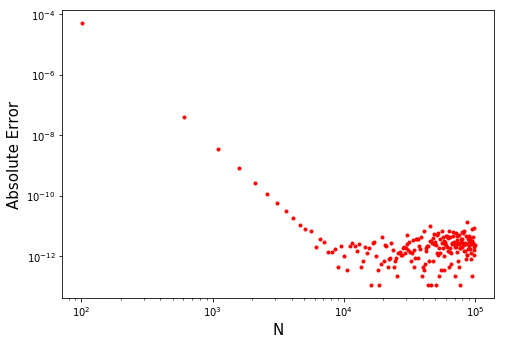

CPU times: user 1min 43s, sys: 432 ms, total: 1min 43s
Wall time: 1min 46s


In [6]:
%%time
#--------------------
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#--------------------
tmin = 0.0
tmax = 10.0

#N = Number of points b/w tmin and tmax (including endpoints)
# N_List = [_ for _ in range(101, 10000, 100)]
N_List = [_ for _ in range(101, 100000, 500)]
for N in N_List:
    dt = (tmax - tmin)/(N - 1)
    t_line = np.linspace(tmin, tmax, N)
    
    x = 1.0  #IC
    CalcAns = []
    for t in t_line:
        CalcAns.append(x)
        dx = SolveRK4(dt, t, x)
        xnew = x + dx
        x = xnew
    #-----
    TrueAns = ActualAns(t)
    AbsErr = np.abs(TrueAns - CalcAns[-1])
    ax.plot(N, AbsErr, "r.")
#--------------------
ax.set_xlabel("N", fontsize=15)
ax.set_ylabel("Absolute Error", fontsize=15)

ax.set_xscale('log')
ax.set_yscale('log')
plt.show()